## Question 1: Given some sample data, write a program to answer the following: 

[click here to access the required data set](https://docs.google.com/spreadsheets/d/1c-1RL-rF03WAWJDIKhrwEOXbAAUMyyOPI-NME8UDVOQ/edit?usp=sharing)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

I think something that could be going wrong is that the AOV isn't taking into account how many total sneakers sold.

In [ ]:
import pandas as pd
sheet_id = '1c-1RL-rF03WAWJDIKhrwEOXbAAUMyyOPI-NME8UDVOQ'
df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df.describe()['order_amount']['mean']

3145.128

Which is exactly what it is doing. You can see here that the mean of the order_amount is $3,145.13

### What metric would you report for this dataset?

What metric would I report for this dataset? That isn't very specific question.

 You could report on:
*   What the credit card usage is for the month or for each shop
*   How many shoes are sold on average by each shop
*   AOV

### What is its value?





In [ ]:
credit_card_usage = df['payment_method'].value_counts(normalize=True)['credit_card']*100
print(f'This is the credit card usage for the 30 day period (overall): {credit_card_usage:.2f}%')

This is the credit card usage for the 30 day period (overall): 34.70%


In [ ]:
import numpy as np
avg_number_of_sales = df.groupby(['shop_id']).agg(np.mean)['total_items'].mean()
print(f'This is the average number of items sold per shop for the 30 day period: {avg_number_of_sales:.1f} shoes')

This is the average number of items sold per shop for the 30 day period: 8.7 shoes


In [ ]:
AOV = df['order_amount'].sum()/df['total_items'].sum()
print(f'This is the average order value for the 30 day period: ${AOV:.2f}')

This is the average order value for the 30 day period: $357.92


## Question 2: For this question you’ll need to use SQL. 

[Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### How many orders were shipped by Speedy Express in total?

In [ ]:
sql_query1 = """SELECT Count(OrderID) FROM Orders WHERE ShipperID=1"""
answer_to_sql_query1 = 54

### What is the last name of the employee with the most orders?


In [ ]:
sql_query2 = """SELECT EMPLOYEES.LastName
                FROM EMPLOYEES 
                JOIN ORDERS 
                ON Employees.EmployeeID= ORDERS.EmployeeID 
                GROUP BY EMPLOYEES.LastName 
                ORDER BY COUNT(ORDERS.OrderID) DESC 
                LIMIT 1"""
answer_to_sql_query2 = 'Peacock'

### What product was ordered the most by customers in Germany?

Are we talking about how many people orders contained the products or which product had the most units sold?

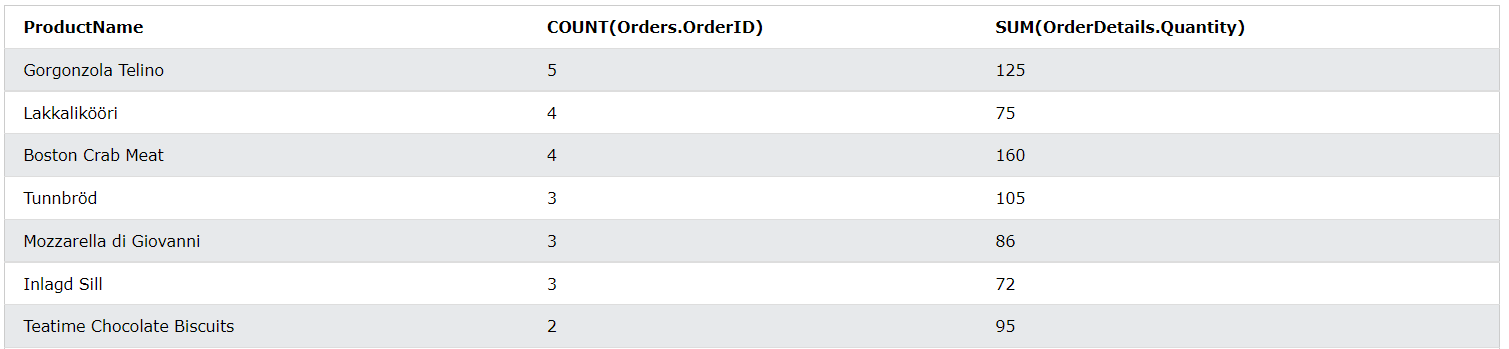

The most common product ordered by customers in Germany

In [ ]:
sql_query3.1 = """SELECT Products.ProductName FROM [Orders] 
JOIN Customers ON Orders.CustomerID=Customers.CustomerID 
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Products ON OrderDetails.ProductID=Products.ProductID
WHERE Customers.Country='Germany'
GROUP BY Products.ProductName
ORDER BY COUNT(Orders.OrderID) DESC
LIMIT 1;
             """
answer_to_sql_query3.1 = 'Gorgonzola Telino'

The most units of a product ordered by customers in Germany

In [ ]:
sql_query3.2 = """SELECT Products.ProductName FROM [Orders] 
JOIN Customers ON Orders.CustomerID=Customers.CustomerID 
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Products ON OrderDetails.ProductID=Products.ProductID
WHERE Customers.Country='Germany'
GROUP BY Products.ProductName
ORDER BY SUM(OrderDetails.Quantity) DESC
LIMIT 1;
             """
answer_to_sql_query3.2 = 'Boston Crab Meat'